<h1>Comparación clasificadores</h1>

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es familiarizarse con la comparación de clasificadores </p>

<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
   <li>Cargar librerías</li>
  <li>Cargar los Datos</li>
  <li>División en Entrenamiento y pruebas</li>
  <li>Entrenamiento y prueba de los clasificadores</li>
  <li>Comparación de los Modelos usando la curva ROC </li>
</ul>

Tiempo estimado: <strong>15 min</strong>

</div>
<hr>

#Paso : Cargar librerías 
  En primer lugar cargaremos las librerías que serán de utilidad para manipular los datos, para crear los clasificadores y compararlos.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Para graficar
from sklearn import tree # Importa el módulo tree https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier # Importa el Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importa la función para dividir el conjunto de datos en train_test_split 
from sklearn import metrics #Importa metricas scikit-learn para el calculo del accuracy
from sklearn import preprocessing #Importa funciones para el procesamiento de los datos
from sklearn.metrics import confusion_matrix #Importa los métodos de cálculo de la matriz de confusión
from sklearn.preprocessing import StandardScaler #Escalamiento decimal
from sklearn.metrics import precision_recall_fscore_support # Importa módulos para calcular métricas a partir de la matriz de confusión
from sklearn.preprocessing import MinMaxScaler # Importa métodos para normalizar usando minMax
from sklearn.ensemble import RandomForestClassifier # Importa el clasificador tipo ensamble llamado Random Forest
from sklearn.model_selection import cross_val_score # Importa módulos para hacer Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold #Para poder generar folds estratificados en CV
from sklearn.neighbors import KNeighborsClassifier # Módulo de la técnica KNN
from sklearn.metrics import roc_curve, auc #Curva ROC y área bajo la curva

#Paso: Cargar los datos 
Lo primero que haremos será cargar los datos ya preparados para aplicar la técnica de Random Forest y para aplicar la técnica de KNN.

In [ ]:
#Datos preparados para árboles de decisión y Random Forest
path1 = "https://www.dropbox.com/s/luaprnba30n660d/AdventureWorksPreparedRForest.csv?dl=1"
#Datos preparados para técnicas basadas en distancia como KNN
path2 = "https://www.dropbox.com/s/a5ikfcnhyapremr/AdventureWorksPreparedKNN.csv?dl=1"



#Lectura del archivo csv
df1 = pd.read_csv(path1, sep=";", encoding = "utf-8", decimal=',')
df2 = pd.read_csv(path2, sep=";", encoding = "utf-8", decimal=',')

#Paso: División en Entrenamiento y Pruebas
Dividiremos el conjunto de datos en entrenamiento 70% y prueba 30% para generar dos modelos distintos.

In [ ]:
#Dividiremos el conjunto de datos en característicias (features) y la variable objetivo (target)
feature_cols = ['EstadoCivil', 'Sexo', 'IngresosAnuales', 'TotalHijos','Educacion','TieneCasa','NumeroCarros','Edad','DistanciaTrabajo']

#Datos para la creación del clasificador Random Forest
X1 = df1[feature_cols] # Features o Características que corresponde a las variables predictoras
y1 = df1.CompradorBicleta # Target o variable objetivo

#Datos para la creación del clasificador KNN
X2 = df2[feature_cols] # Features o Características que corresponde a las variables predictoras
y2 = df2.CompradorBicleta # Target o variable objetivo


In [ ]:
# Dividir el conjunto de datos conjunto de entrenamiento y en conjunto de pruebas
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

#Paso: Entrenamiento y prueba de los clasificadores
Se entrenará el modelo con el conjunto de entrenamiento (X_train y Y_train) y luego haremos la predicción al conjunto de prueba (X_test). Se generarán dos clasificadores, uno será usando el algoritmo del Random Forest y otro con el algoritmo de KNN.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Crear el clasificador 1 con Random Forest
clf1 = RandomForestClassifier(n_estimators=100, random_state=0)
# Entrenar el Random Forest
clf1.fit(X1_train, y1_train)
#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y1_pred = clf1.predict(X1_test)
print("Accuracy del Modelo con Random Forest:", metrics.accuracy_score(y1_test, y1_pred))

# Crear el clasificador 2 con KNN.
clf2 = KNeighborsClassifier(n_neighbors= 5, weights= "distance")
# Entrenar el clasificador
clf2 = clf2.fit(X2_train,y2_train)
#Predecir los valores del conjunto de entrenamiento
y2_pred = clf2.predict(X2_test)
print("Accuracy del Modelo con KNN:", metrics.accuracy_score(y2_test, y2_pred))


Accuracy del Modelo con Random Forest: 0.788496213487198
Accuracy del Modelo con KNN: 0.7659574468085106


#Paso: Comparación de los Modelos usando la curva ROC
La curva ROC representa gráficamente la tasa de  verdaderos positivos (VP)  frente a la tasa falsos positivos (FP) también según se varía el umbral. Entre más rápido crezca la tasa de VP y más lento la de FP, mejor será el clasificador. El AUC, entre más cercano a 1 será un mejor clasificador. Se calculará la curva ROC (y su respectiva área bajo la curva AUC) para comparar visualmente los modelos generados.

In [ ]:
# Calcularemos la curva ROC y el área bajo la curva para el clasificador Random Forest
probs1 = clf1.predict_proba(X1_test)
fpr1, tpr1, threshold =roc_curve(y1_test, probs1[:,1], pos_label="1.0")
roc_auc1 = metrics.auc(fpr1, tpr1)

# Calcularemos la curva ROC y el área bajo la curva para el clasificador KNN
probs2 = clf2.predict_proba(X2_test)
fpr2, tpr2, threshold =roc_curve(y2_test, probs2[:,1], pos_label="1.0")
roc_auc2 = metrics.auc(fpr2, tpr2)

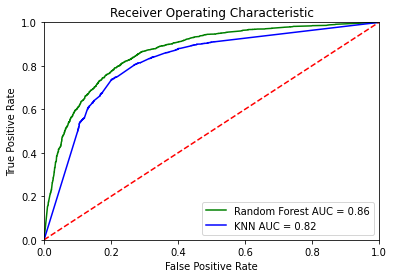

In [ ]:
# Graficaremos las dos curvas ROC. La línea punteada representa un clasificador aleatorio.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'Random Forest AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'KNN AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()